### __BUSA3020 Group Assignment - Predicting Used Car Sale Prices__

--- 

**Kaggle Competition Ends:** Friday, 31 May 2024 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 31 May 2024 @ 11.59pm (Week 13)  

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models

**Instructions:** 

- Form a team of 3 students 
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/ff5fb5beaeb14f7686df98fef9d1c0bc](https://www.kaggle.com/t/ff5fb5beaeb14f7686df98fef9d1c0bc)
    - Team leader to click on `team` and join and invite other 2 team members to join
    - Your **team's name must start** with our unit code, for instance you could have a team called BUSA3020_algorithm_arena
- All team members should work on all the tasks however   
    - Each team member will be responsible for one of the 3 tasks listed below    
- **Your predictions must be generated by a model you develop here** 
    - You will receive a mark of **zero** if your code is not able produce the forecasts you submit to Kaggle 

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 1,500 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 1,500 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 
- 1 mark: Ranking in the top 5 positions on the **final** leaderboard for your unit 
- 3 marks: Reaching the 1st place in your unit according to the **final** leaderboard ranking


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Limit of 20 submission per day
2. On iLearn **only team leader to submit** the assignment Jupyter notebook re-named to your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and the group name Kaggle
    - One 15 minute video recording of your work 
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)
    - You don't need to score yourself

---
---

**Fill out the following information**

- Team Name on Kaggle: `BUSA3020_datanoobs`
- Team Leader and Team Member 1: `Chau Anh Cong`
- Team Member 2: `Tran Tuan Huy Bui`
- Team Member 3: `Thomas Haywood Ruiz`

---
---

**Import Libraries and Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
#pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None) # pretty printing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

# supress warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

---

## Task 1: Problem Description and Initial Data Analysis

1. Based on the Competition Overview, datasets and additional information provided on Kaggle, along with insights gained from personal research of the topic, write **Problem Description** (about 500 words) focusing on the sections listed below: 
- Forecasting Problem - explain what we are trying to do and how it could be used in the real world, e.g. who and how may benefit from it (3 marks)    
- Evaluation Criteria - discuss the criteria that  is used to assess forecasting performance in detail (3 marks)     
- Categorise the variables provided in the dataset according to their type; Hint: similar to what we had in Programming Task 1 (2 marks)  
- Missing Values - only explain what you find for both the training and test datasets at this stage (2 marks)
- Provide and discuss some interesting *univariate* summary statistics and distributions in the training dataset  (2 marks)       
- Other Hints:
    - You should **not** discuss any specific predictive algorithms at this stage
    - Minimise the number of cells you use to enhance presentation and readability

**Total Marks: 12**   

Student in charge of this task: `Thomas Haywood Ruiz`

The objective of this exploratory data analysis is to develop predictive models to accurately estimate car prices based on various features, such as year, horsepower, fuel economy, and power. To prepare the data for predictive modelling, common analytical techniques will be employed to correctly prepare the data, like handling missing values, and feature engineering. This model aims to identify which attributes have the most significant impact on car value to provide useful insights to stakeholders for more informed decision-making. Consumers can leverage the findings to make a more informed decision when buying or selling a vehicle. Car dealerships and online marketplaces can optimise their pricing strategies based on features that have the most impact on car value. Additionally, insurance companies can utilise this data to determine insurance premiums based on the results collected from predictive analysis.


The evaluation criteria for assessing the performance of the forecast model will be measured on the mean absolute percentage error (MAPE). MAPE is calculated using the following formula:

$$
\text{MAPE} = \frac{1}{n} \sum_{i=t}^{n} \left| \frac{A_t - F_t}{A_t} \right| \times 100
$$
where:
- $n$ is the number of observations,
- $A_i$ is the actual value
- $F_i$ is the forecasted value

MAPE is used to measure the accuracy of forecast models, and expresses the difference between the forecasted and actual values as a percentage. For optimal model selection, the model with the lowest MAPE is typically considered the most suitable for the dataset. Since MAPE is expressed as a percent, it is easily understood by non-technical stakeholders. 


Table listing all the features present in the dataset and their type

|Variable Kind|Number of Features|Feature Names|
| --- | --- | --- |
| Numeric | 10 |  `city_fuel_economy`, `daysonmarket`, `engine_displacement`, `highway_fuel_economy`, `horsepower`, `latitude`, `longitude`, `mileage`, `savings_amount`, `seller_rating`    |
| Nominal  | 16 | `vin`, `body_type`, `city`, `dealer_zip`, `engine_type`, `exterior_color`, `franchise_dealer` `fuel_type`, `interior_color`, `is_new`, `listing_color`, `make_name`, `model_name`, `transmission`, `transmission_display`, `wheel_system` |
| Date  | 2 | `listed_date`, `year` |
| Text  | 10 | `back_legroom`, `front_legroom`, `fuel_tank_volume`, `height`, `length`, `maximum_seating`, `wheelbase`, `width`, `power`, `torque` |

In [3]:
training_missing_values = df.isnull().sum()
training_missing_columns = training_missing_values[training_missing_values > 0]
print("Number of missing values for training", training_missing_columns.sum())
print(training_missing_columns)

Number of missing values for training 1807
back_legroom              3
exterior_color          110
franchise_dealer         84
front_legroom             3
fuel_tank_volume          3
height                    3
interior_color          805
latitude                134
length                    3
maximum_seating           3
mileage                 282
power                     8
savings_amount          108
seller_rating           100
transmission             75
transmission_display     75
wheel_system              2
wheelbase                 3
width                     3
dtype: int64


In [4]:
test_missing_values = df_test.isnull().sum()
test_missing_columns = test_missing_values[test_missing_values > 0]
print("Number of missing values for test:",test_missing_columns.sum())
print(test_missing_columns)

Number of missing values for test: 2597
back_legroom             25
city_fuel_economy       349
engine_displacement      27
engine_type              59
exterior_color           45
franchise_dealer         39
front_legroom            25
fuel_tank_volume         25
fuel_type                45
height                   25
highway_fuel_economy    349
horsepower               27
interior_color          379
latitude                 41
length                   25
maximum_seating          25
mileage                 149
power                   325
savings_amount           42
seller_rating            29
torque                  365
transmission             59
transmission_display     59
wheel_system              9
wheelbase                25
width                    25
dtype: int64


There are more missing values in the test dataset than training. The variable with the highest missing values is interior_color in the training dataset. To ensure reliability and accuracy within the analysis, these missing values need ot be properly handled. 

In [5]:
df.describe()

,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,savings_amount,seller_rating,year,price
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,6866.000000,7000.000000,6718.000000,6892.000000,6900.000000,7000.000000,7000.000000
mean,21.497429,75.878571,50472.137714,2881.928571,28.661714,245.218429,36.957835,-90.594488,31088.643049,551.306152,4.274146,2017.746857,28851.277693
std,4.857918,105.594450,27196.771983,1206.612725,5.658987,87.436127,5.027006,13.826897,44033.494511,929.364379,0.517830,3.608016,17582.731720
min,10.000000,0.000000,1089.000000,1000.000000,13.000000,78.000000,24.571900,-123.205000,0.000000,0.000000,1.000000,1990.000000,650.000000
25%,18.000000,15.000000,30047.000000,2000.000000,24.000000,174.000000,33.484625,-96.951600,6.000000,0.000000,4.000000,2017.000000,17986.500000
50%,21.000000,36.000000,47893.000000,2500.000000,28.000000,243.000000,37.808200,-86.972800,11454.000000,0.000000,4.355556,2019.000000,25387.000000
75%,25.000000,80.000000,76457.000000,3500.000000,33.000000,300.000000,40.925750,-80.704600,43428.250000,834.000000,4.615385,2020.000000,36992.000000
max,70.000000,1259.000000,99362.000000,6800.000000,75.000000,797.000000,48.861600,-67.997400,285788.000000,12596.000000,5.000000,2021.000000,350000.000000


The summary statistics show:
* The seller-rating reveals most sellers have a high rating, considering the mean is 4.27 and rating range is 1 to 5.
* The price shows high variation as the cheapest car is `$650`, and most expensive is `$350000`.
* The year model for cars range from 1990 to 2021.

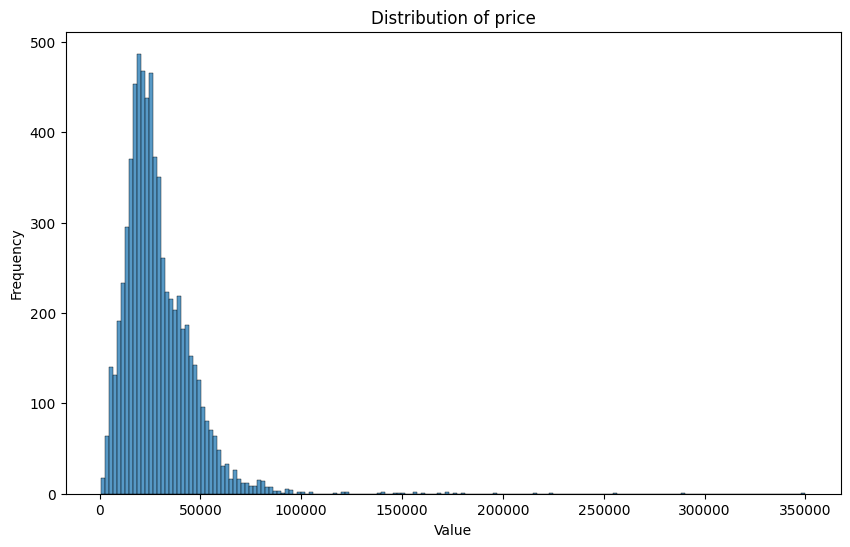

count      7000.000000
mean      28851.277693
std       17582.731720
min         650.000000
25%       17986.500000
50%       25387.000000
75%       36992.000000
max      350000.000000
Name: price, dtype: float64


In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'])
plt.title('Distribution of price')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(df['price'].describe())

These statistics on price distribution reflect market trends, product demand, and availibilities of certain vehicles. The average price of listed cars is approximately `$28851` which gives insight into typical range of car prices, so more regular priced vehicles are being advertised due to the higher availability of lower end cars. The 75th percentile is `$36992` which indicates that 75% of listed cars falls below this value, so typically regular priced cars are being listed over higher end; however, the presence of higher outliers reveals that there still are some high-end luxury cars being listed too. 

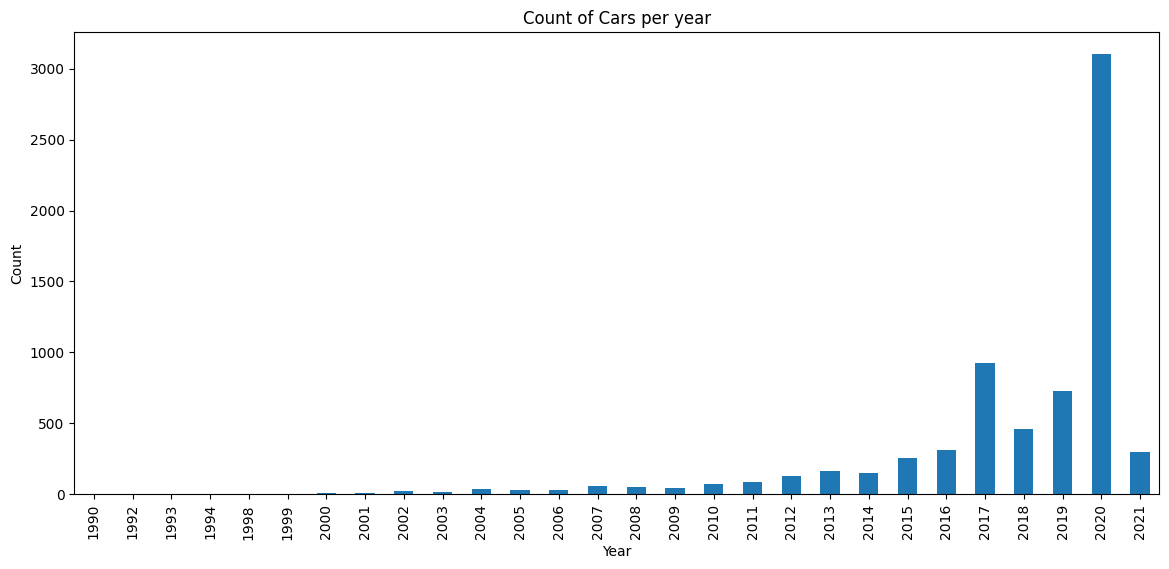

In [7]:
year_counts = df['year'].value_counts().sort_index() 

plt.figure(figsize=(14, 6))
year_counts.plot(kind='bar')
plt.title('Count of Cars per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

There is a higher frequency of more recently manufactured cars being listed compared to older ones. Additionally, considering the price distribution graph, most of these later-made vehicles are priced cheaper which indicates that the year of manufacture may affect the price of a car's value. Moreover, the substantial increase in number of cars listed in 2020 compared to other years suggests several possible reasons:

* There is a high demand for cars manufactured in 2020.
* More people are trying to sell their car made in 2020.
* There was a major increase in car manufacturing in 2020 with more vehicles being created. 

In [8]:
print(df['is_new'].value_counts())

is_new
False    3728
True     3272
Name: count, dtype: int64


The split between new and old cars is fairly close.


---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering
- In this task you need to follow a set of instructions/questions listed below.
- Make sure you explain each answer carefully both in Markdown text, as well as on your video.

**Total Marks: 12**

Student in charge of this task: `Tran Tuan Huy Bui`

In [9]:
class Cleaner:

    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()


    def extract_numerical_values(self, features: list):
        for feature in features:
            self.df[feature] = self.df[feature].str.split().str[0]
            self.df[feature] = pd.to_numeric(self.df[feature], errors='coerce')
        #return self.df


    def extract_multiple_numerical_values(self, feature:str, value1:str, value2:str):
        '''
        Extracts two numerical values from a torque and power
        '''

        self.df[value1] = self.df[feature].str.extract(r'(\d+)', expand=False)\
                                        .apply(pd.to_numeric, errors='coerce')
                                        
        self.df[value2] = self.df[feature].str.extract(r'@\s*(\d+,?\d*)', expand=False)
        self.df[value2] = self.df[value2].str.replace(r',', '', regex=True)\
                                        .apply(pd.to_numeric, errors='coerce')

        del self.df[feature]


    def impute_numerical_columns(self, numerical_cols:list):
        self.df[numerical_cols] = self.df.loc[:, numerical_cols] \
                                    .fillna(self.df[numerical_cols].mean(axis=0))        


    def impute_categorical_columns(self, categorical_cols:list):
        self.df[categorical_cols] = self.df.loc[:, categorical_cols] \
                                    .fillna(self.df[categorical_cols].mode(axis=0).iloc[0])
    
    
    def time_extract(self, feat):
        listed_date_idx = self.df.columns.get_loc(feat)

        # Convert 'listed_date' column to datetime with mixed formats
        self.df[feat] = pd.to_datetime(self.df[feat], format='mixed', errors='coerce')

        # Insert 'listed_year' column next to 'listed_date'
        self.df.insert(listed_date_idx + 1, 'listed_year', self.df[feat].dt.year)

        # Insert 'listed_month' column after 'listed_year'
        self.df.insert(listed_date_idx + 2, 'listed_month', self.df[feat].dt.month)

        
    def check_most_frequent(self, df, feature: list, n: int, counts_show: bool):
        # Create a dataframe to check the most frequent values of each categorical feature
        most_fq_df = pd.DataFrame()

        for feat in feature:
            value_counts = df[feat].value_counts().head(n)

            top_values_df = value_counts.reset_index()

            if counts_show:
                top_values_df.columns = [feat, f'{feat}_count']
            else:
                del top_values_df['count']

            most_fq_df = pd.concat([most_fq_df, top_values_df], axis=1)

        print(most_fq_df.head(n))

        
    def check_most_frequent_color(self, color: list, insensitive_color: bool, n: int, counts_show: bool):
        colorFeat = ['exterior_color', 'interior_color', 'listing_color']
        # df_color = self.df[colorFeat].copy()

        for feat in colorFeat:
            self.df[feat] = self.df[feat].apply(lambda x: self.match_color(x, insensitive_color, color))

        self.check_most_frequent(self.df, colorFeat, n, counts_show)

        
    def match_color(self, observation, insensitive_color, color):
        # Convert the observation to lowercase for case-insensitive matching
        observation = str(observation).lower()

        # Initialize a set to store matched colors
        matched_colors = set()

        if insensitive_color:
            # Check for specific cases
            if 'silver' in observation or 'grey' in observation:
                matched_colors.add('gray')
            elif 'gold' in observation:
                matched_colors.add('yellow')

        # Check if any word in the observation matches a color
        for word in observation.split():
            if word in color:
                matched_colors.add(word)

        # If more than one color is matched, return 'other'
        if len(matched_colors) > 1:
            return 'other'
        # If only one color is matched, return that color
        elif len(matched_colors) == 1:
            return matched_colors.pop()
        # If no match is found, return 'other'
        else:
            return 'other'
        
        
train_cleaner = Cleaner(df)
test_cleaner = Cleaner(df_test)

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, back_legroom feature is in object format containing both numerical values and text. Extract numerical values (equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [10]:
num_one_item_col = ['back_legroom','front_legroom', 
                  'fuel_tank_volume', 'height', 'length', 
                  'maximum_seating', 'wheelbase', 'width']

train_cleaner.extract_numerical_values(num_one_item_col)
test_cleaner.extract_numerical_values(num_one_item_col)                

`num_one_item_col` is a list that contains columns which have values with one number and one text for each row (e.g., back legroom, front legroom, fuel tank volume, height, length, maximum seating, wheelbase, and width).

The `extract_numerical_values` method is called on both `train_cleaner` and `test_cleaner` objects, passing the `num_one_item_col` list as an argument. Running the method will only keep the number but remove the text of that observation.

**Task 2, Question 2** Create at least 5 new features from the existing numerical variables which contain multiple items of information, for example you could extract maximum torque and torque rpm from the torque variable.  
(2 marks)

In [11]:
train_cleaner.extract_multiple_numerical_values('torque', 'max_torque', 'torque_rpm')
train_cleaner.extract_multiple_numerical_values('power', 'max_power', 'power_rpm')

test_cleaner.extract_multiple_numerical_values('torque', 'max_torque', 'torque_rpm')
test_cleaner.extract_multiple_numerical_values('power', 'max_power', 'power_rpm')


In [12]:
train_cleaner.df['car_age'] = 2024 - train_cleaner.df['year']

test_cleaner.df['car_age'] = 2024 - test_cleaner.df['year']

In [13]:
train_cleaner.df.drop(['year'], axis=1, inplace=True)

test_cleaner.df.drop(['year'], axis=1, inplace=True)

In [14]:
train_cleaner.time_extract('listed_date')
test_cleaner.time_extract('listed_date')

By using `extract_multiple_numerical_values` from `Cleaner` class, it modifies these two features:

- For the `torque` variable, the method extracts the maximum torque value and stores it in the `max_torque` column, and it extracts the RPM value at which the maximum torque occurs and stores it in the `torque_rpm` column.

- Similarly, for the `power` variable, the method extracts the maximum power value and stores it in the `max_power` column, and it extracts the RPM value at which the maximum power occurs and stores it in the `power_rpm` column.

`car_age` feature is created in order to measure how long it has been available since the first selling year, which is `year` variable. After that, `year` is removed.

By applying `time_extract` from `Cleaner` class to `listed_date`, it creates two new features called `listed_month` and `listed_year`.

**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(3 marks)

In [15]:
numerical_cols = ['back_legroom', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 
                  'front_legroom', 'fuel_tank_volume', 'height', 'highway_fuel_economy', 'horsepower', 
                  'latitude', 'longitude', 'length', 'maximum_seating', 'mileage', 'savings_amount', 
                  'seller_rating', 'max_torque', 'torque_rpm', 'max_power', 'power_rpm', 'wheelbase', 'width']

train_cleaner.impute_numerical_columns(numerical_cols)

test_cleaner.impute_numerical_columns(numerical_cols)

In [16]:
categorical_cols = ['body_type', 'city', 'dealer_zip', 'engine_type', 'exterior_color', 'franchise_dealer', 'fuel_type',
                    'interior_color', 'is_new', 'listing_color', 'make_name', 'model_name', 'transmission', 'transmission_display', 'wheel_system']

train_cleaner.impute_categorical_columns(categorical_cols)

test_cleaner.impute_categorical_columns(categorical_cols)

`numerical_cols` stores all the numerical values availble in the dataset. After apply `impute_numerical_columns` to every feature that matches with `numerical_cols`, any null observation will be replaced with the average value of that feature.

`categorical_cols` stores all the categorical values availble in the dataset. Any null observation will be replaced with the most frequent value of that feature by applying `impute_categorical_columns`.

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, map colours into 5 basic colours + 'other': [red, yellow, green, blue, purple, other] and then encode.  
(2 marks)

In [17]:
train_cleaner.df['franchise_dealer'] = train_cleaner.df['franchise_dealer'].astype(int)
train_cleaner.df['is_new'] = train_cleaner.df['is_new'].astype(int)


test_cleaner.df['franchise_dealer'] = test_cleaner.df['franchise_dealer'].astype(int)
test_cleaner.df['is_new'] = test_cleaner.df['is_new'].astype(int)

feats_to_remove = ['franchise_dealer', 'is_new']

cat_without_bool_cols = [col for col in categorical_cols if col not in feats_to_remove]

In [18]:
# Define the list of colors
color = ('black', 'white', 'gray', 'red', 'yellow', 'green', 'blue', 'purple', 'other')
color_cols = ['exterior_color', 'interior_color', 'listing_color']

no_color_cols = [col for col in cat_without_bool_cols if col not in color_cols]

In [19]:
print('Most frequent values in each feature except color features')
train_cleaner.check_most_frequent(train_cleaner.df, no_color_cols, 6, True)
print('\n' * 5)

print('Most frequent colors')
train_cleaner.check_most_frequent_color(color, True, 6, False)

Most frequent values in each feature except color features
         body_type  body_type_count         city  city_count  dealer_zip  \
0  SUV / Crossover             3534      Houston         117       77477   
1            Sedan             1846        Miami          49       33619   
2     Pickup Truck              905     Columbus          49       43228   
3          Minivan              233  San Antonio          47       32505   
4            Coupe              166        Tampa          46       85297   
5        Hatchback              135    Las Vegas          39       30060   

   dealer_zip_count           engine_type  engine_type_count  \
0                22                    I4               3633   
1                20                    V6               1968   
2                17                    V8                638   
3                16  V6 Flex Fuel Vehicle                180   
4                15                    H4                176   
5                14  V8 

In [20]:
print('Most frequent values in each feature except color features')
test_cleaner.check_most_frequent(test_cleaner.df, no_color_cols, 6, True)
print('\n' * 5)

print('Most frequent colors')
test_cleaner.check_most_frequent_color(color, True, 6, False)

Most frequent values in each feature except color features
         body_type  body_type_count         city  city_count  dealer_zip  \
0  SUV / Crossover             1441      Houston          47       77477   
1            Sedan              791     Columbus          25       32505   
2     Pickup Truck              442        Miami          21       37040   
3        Hatchback               82    Las Vegas          20       43228   
4            Coupe               74  San Antonio          18       77074   
5          Minivan               68  Springfield          17       75080   

   dealer_zip_count           engine_type  engine_type_count  \
0                 9                    I4               1535   
1                 8                    V6                755   
2                 8                    V8                286   
3                 8                    H4                 73   
4                 7                    I3                 71   
5                 7  V8 

In [21]:
common_feat = pd.DataFrame()

for feat in cat_without_bool_cols:
    train_counts = train_cleaner.df[feat].value_counts()
    test_counts = test_cleaner.df[feat].value_counts()

    common = train_counts.index.intersection(test_counts.index)

    common_counts = pd.DataFrame({'train_counts': train_counts[common],
                                   'test_counts': test_counts[common]})

    common_counts[f'{feat}_total_counts'] = common_counts['train_counts'] + common_counts['test_counts']
    common_counts = common_counts.sort_values(f'{feat}_total_counts', ascending=False)

    # Move the index to a new column 'column1' and reset the index to numbers
    common_counts = common_counts.reset_index().rename(columns={'index': 'column1'})
    
    # Get the first column of common_counts and store it in a new column named after the feature
    common_feat[feat] = common_counts[feat]

In [22]:
def modify_value(df):
    top_5_common_feat = common_feat.head(5)
    for feat in no_color_cols:
        df[feat] = df[feat].astype(str)
        top_5_common_feat.loc[:, feat] = top_5_common_feat[feat].astype(str)

        df[feat] = df[feat].\
                        str.lower().apply(lambda x: x if str(x) in top_5_common_feat[feat].\
                        str.lower().values else 'other')
        
    top_5_common_feat = common_feat.head(6)    
    for feat in color_cols:
        df[feat] = df[feat].astype(str)
        top_5_common_feat.loc[:, feat] = top_5_common_feat[feat].astype(str)

        df[feat] = df[feat].\
                        str.lower().apply(lambda x: x if str(x) in top_5_common_feat[feat].\
                        str.lower().values else 'other')
        
    del df['vin']
    del df['listed_date']
        
    return df

train_cleaner.df = modify_value(train_cleaner.df)
test_cleaner.df = modify_value(test_cleaner.df)

In [23]:
def encode(df, feats):
    for feat in feats:
        one_hot = pd.get_dummies(df[[feat]], dtype=int)
        # print(one_hot.head())

        df = df.join(one_hot)
        
        del df[feat]
        
    return df

train_encoded_df = encode(train_cleaner.df, cat_without_bool_cols)
test_encoded_df = encode(test_cleaner.df, cat_without_bool_cols)
train_encoded_df['fuel_type_other'] = np.zeros(train_encoded_df.shape[0]).astype(int)

Overall, this blocks of code do the following steps:
- Firstly, we remove the boolean data in the categorical as there is no reason to match the most frequent value for these features.
- Secondly, it show the most frequent item of each feature in order to have an overview of which value should be taken into the encoded part. However, for any color variable, we create a list of basic color and match the observation value to it.
- Thirdly, we have to find the most five common values, excluding `other`, of each feature in both train and test dataset.
- Fourthly, because the color they have a large number of `other` values, we have to macth color features separately. We modify the non-color features first and then do the color feature. This step is called matching step. After being matched, the `vin` and `listed_date` features are removed.
- Finally, we encode the categorical features by creating new dummy variables for each of them.

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [24]:
# Function to categorize regions based on latitude
def categorize_region(lat):
    if lat > 42:  # Rough example for colder regions (e.g., Northern US, Canada)
        return 'cold'
    elif 35 <= lat <= 42:  # Example for central temperate regions (e.g., Midwestern US)
        return 'temperate'
    else:  # Warmer temperate regions (e.g., Southern US)
        return 'warm_temperate'

# Assess drive system suitability based on region
def assess_drive_system_suitability(row):
    if row['region'] == 'cold':
        return row['wheel_system_awd'] + row['wheel_system_4wd']  # Prefer AWD/4WD in cold regions
    elif row['region'] == 'temperate':
        return row['wheel_system_fwd'] + row['wheel_system_rwd']  # Prefer FWD/RWD in central temperate regions
    else:  # Warm temperate regions
        return row['wheel_system_fwd']  # Prefer FWD in warm temperate regions
    

def add_additional_features(df):

    # Performance Index
    df['performance_index'] = (df['horsepower'] + df['max_torque']) / df['engine_displacement']

    # Comfort Index
    df['comfort_index'] = (df['back_legroom'] + df['front_legroom'] + df['height'] + df['width']) / 4

    # Fuel Efficiency Score
    df['fuel_efficiency_score'] = (df['city_fuel_economy'] + df['highway_fuel_economy']) / 2

    # Seating Efficiency
    df['seating_efficiency'] = df['maximum_seating'] / (df['length'] * df['width'] * df['height'])

    # Resale Value Factor (assuming car age, make name, and body type influence this factor)
    df['resale_value_factor'] = df['car_age'] * df['make_name_other'] * df['body_type_suv / crossover']

    # Flag newly listed cars
    df['newly_listed'] = df['daysonmarket'].apply(lambda x: 1 if x <= 30 else 0)
        
    # Region category
    df['region'] = df.apply(lambda row: categorize_region(row['latitude']), axis=1)

    # Assess drive system suitability
    df['drive_system_suitability'] = df.apply(assess_drive_system_suitability, axis=1)

    df[['performance_index', 'comfort_index', 'fuel_efficiency_score','seating_efficiency', 'resale_value_factor', 'newly_listed', 'drive_system_suitability']].astype(float)
    

add_additional_features(train_encoded_df)
add_additional_features(test_encoded_df)

train_encoded_df = encode(train_encoded_df, ['region'])
test_encoded_df = encode(test_encoded_df, ['region'])

In [25]:
# Initialize and train the Random Forest Regressor
X = train_encoded_df.drop('price', axis=1)
y = train_encoded_df['price']

rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=30, random_state=42)
rf_regressor.fit(X, y)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

# Sort the features by importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the sorted feature importances
print(feature_importances_df)

                      feature    importance
22                 max_torque  2.816573e-01
17                    mileage  1.388314e-01
9                  horsepower  1.263771e-01
26                    car_age  1.187979e-01
24                  max_power  5.556597e-02
..                        ...           ...
83           model_name_rogue  3.219791e-06
85            model_name_trax  2.943906e-06
88   transmission_dual clutch  2.713253e-06
61           fuel_type_hybrid  7.938097e-08
101           fuel_type_other  0.000000e+00

[112 rows x 2 columns]


In [26]:
feature_importances_df['cumulative_importance'] = feature_importances_df['importance'].cumsum()

# Determine the threshold for cumulative importance
threshold = 0.995
rf_selected_features = feature_importances_df[feature_importances_df['cumulative_importance'] <= threshold]['feature']

# # Display the selected features
# print(f"Selected features (cumulative importance <= {threshold*100}%): {rf_selected_features.tolist()}")

In this question, after running some test with the models, we think we should create new variables which based on our research and the conducted dataset. The following are the description for each new feature:
- `performance_index`: Combine horsepower, max torque, and engine displacement to create an overall performance score.
- `comfor_index`: Use back legroom, front legroom, height, and width to assess the car's comfort level for passengers.
- `fue_efficiency_score`: Combine city and highway fuel economy to create a comprehensive fuel efficiency score.
- `seating_efficiency`: Calculate how efficiently the car uses its interior space based on maximum seating and vehicle dimensions (length, width, height).
- `resale_value_factor`: Consider factors like car age, make name, and body type to estimate the car's resale value. Some brands and body types retain value better over time.
- `newly_listed`: A feature to denote that the car has just been listed on the website for less than 30 days.
- `region`: Use  latitude to determine the region of the car. Car prices can be influenced by local preferences and climate conditions.
- `drive_system_suitability`: Assess how well the drive system (AWD, FWD, etc.) suits the car's body type and intended use (e.g., SUVs with AWD may be more valuable).

Regarding `categorize_region` function, we find that if the value of `latitude` is greater than `42`, it will be `cold` area. if the value is between `42` and `35` inclusively, `temperate` area will be approriately matched for this observation. Otherwise, the rest will be matched as `warm_temperat` area.

Regarding `assess_drive_system_suitability` function, according to our research, customers tend to prefer `AWD`/`4WD` in cold region, `FWD`/`RWD` in central temperate regions, and `FWD` in warm temperate regions.

After that, we softly conduct Random Forest Regressor in order to get the important values of its result.

Finally, the purpose of selecting a subset of features based on their cumulative importance scores and setting a threshold for it is to retain the features that collectively account for a significant portion of the model's predictive power, while potentially reducing the dimensionality of the dataset and improving model performance and interpretability.

**Task 2, Question 6**: Perform some EDA to measure the relationship between the features and the target and carefully explain your findings. 
(2 marks)

In [27]:
plotdf = train_encoded_df[rf_selected_features]
plotdf['price'] = train_encoded_df['price']

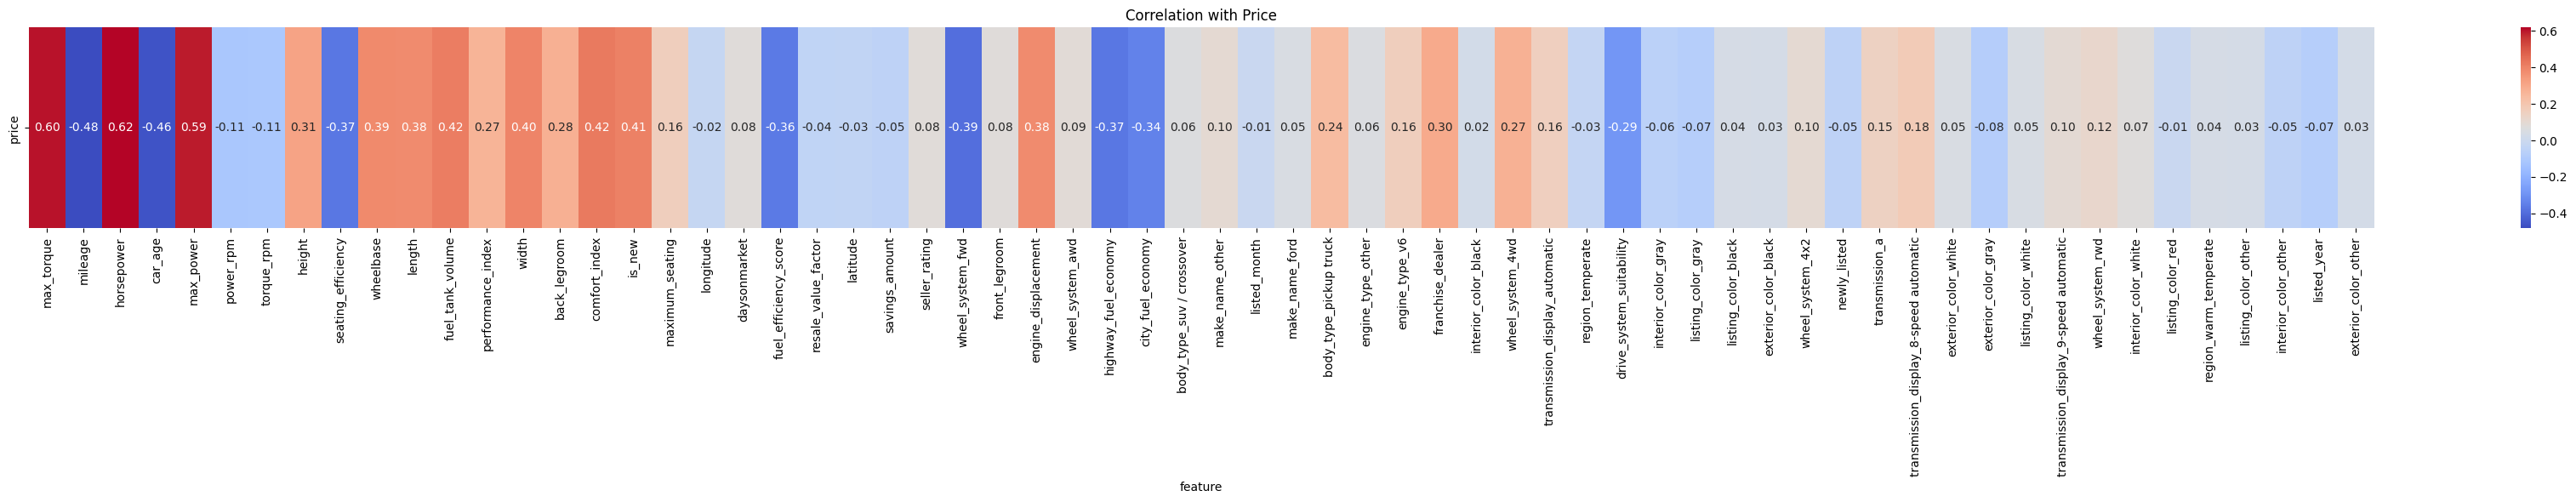

In [28]:
corr = plotdf.corr()['price'].drop('price')

# Convert the Series to a DataFrame
corr_df = corr.to_frame().reset_index()
corr_df.columns = ['feature', 'price']

# Plot the correlation matrix with price
plt.figure(figsize=(35, 6))
sns.heatmap(corr_df.set_index('feature').T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Price')
plt.tight_layout()
plt.show()

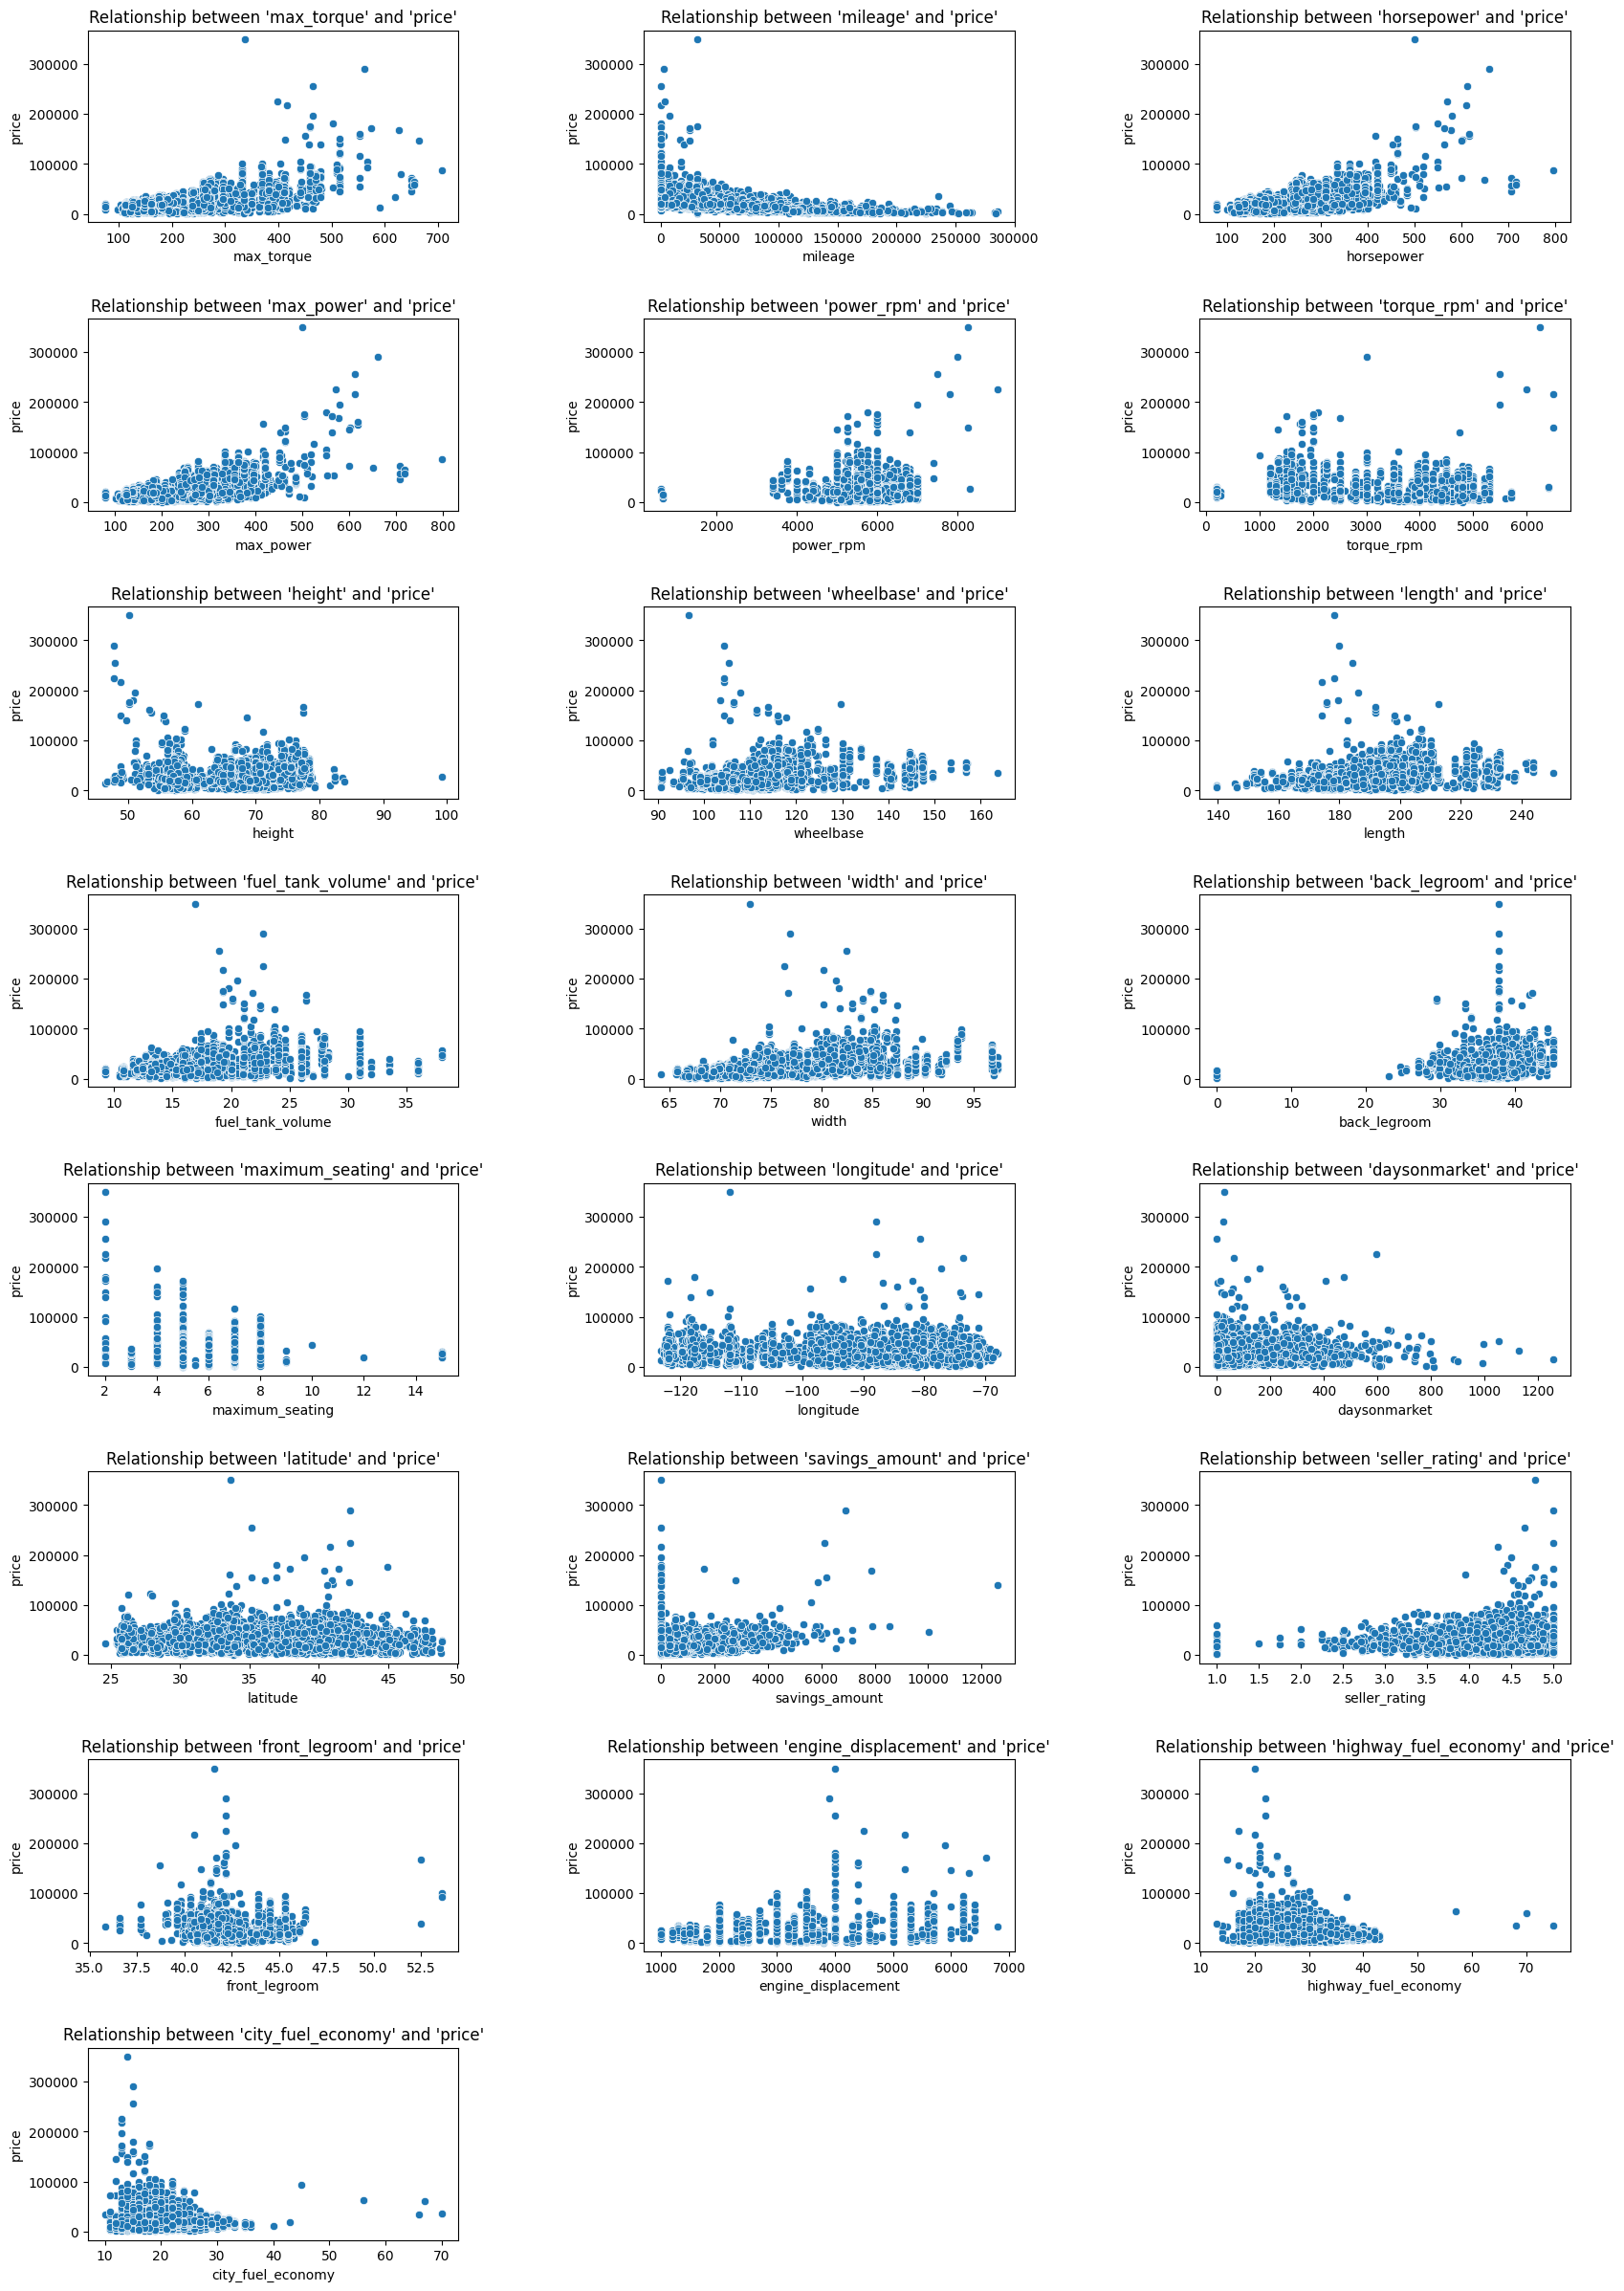

In [29]:
# Filter selected features to include only numerical columns
selected_features = [feature for feature in rf_selected_features if feature in numerical_cols]

# Calculate the number of rows and columns for the grid layout
num_plots = len(selected_features)
num_cols = 3  # Adjust the number of columns as desired
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a figure with a grid layout
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 30), squeeze=False)

# Iterate over selected features and create scatter plots
for i, feature in enumerate(selected_features):
    row = i // num_cols
    col = i % num_cols
    
    # Create a scatter plot for the current feature against 'price'
    ax = axs[row, col]
    sns.scatterplot(x=train_encoded_df[feature], y=train_encoded_df['price'], ax=ax)
    
    # Set the title for the subplot
    ax.set_title(f"Relationship between '{feature}' and 'price'")

# Hide empty subplots
for ax in axs.flat:
    if not ax.has_data():
        ax.set_visible(False)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Display the figure
plt.show()

After running and plotting the correlation matrix with `price`, we observe that there is not many strong correlation between `price` and other features. The highest value of roughly `0.62` belongs to `horsepower` variable. This results in that the linear relationship may not be approriate for this dataset.

However, according to the scatter plots between each important variable and `price`, most of them show a non-linear relationship with `price`. Therefore, more actions will be taken in account in task 3.

--- 
## Task 3: Fit and tune a forecasting model, submit predictions & win competition

Make sure you **clearly explain each step** you do both in Markdown and on the recoded video.   
*In this task you must not create any additional features and should only relly on the datasets constructed in Task 2.*

1. Build and explain at least 3 machine learning (ML) regression models taking into account the outcomes of Tasks 1 & 2 (3 marks)    
2. Fit the models and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly (3 marks)   
3. Select your best algorithm, create predictions using the test dataset, and submit your predictions on Kaggle's competition page. Make sure you explain all the steps that led you to chose this algorithm both in the video presentation and in your written answer. (4 marks)   
4. Provide Kaggle ranking and score (screenshot your final submission) and comment (e.g. how could you improve your ranking?) (2 mark)   

- Hints:
    - To perform well you will need to iterate Tasks 2 and Task 3
    - Make sure your Python code works, so that a marker that can replicate your Kaggle submission and score.
    - You will receive the mark of zero if your code does not produce the forecasts uploaded to Kaggle 

**Total Marks: 12**

Student in charge of this task: `Chau Anh Cong`

In [30]:
df_train = train_encoded_df.copy()

y = df_train['price']
X = df_train[rf_selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Define a scorer for the mean absolute percentage error to use in cross-validation

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

## Modelling

We begin the modelling process by establishing baseline models using classic linear regressors. However, the focus would be towards tuning non-linear models as almost all of the selected features exhibit non-linear relationships with the target variable.

### Linear Models

Linear models are sensitive to scale so we standardise the training and testing sets with `StandardScaler()`.

For Ridge and Lasso Regression, we use the `RidgeCV()` and `LassoCV()` class in scikit-learn for built-in cross-validation to tune the hyperparameter `alpha` (regularisation strength).

In [32]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#### Linear Regression

In [33]:

lr_base = LinearRegression()

# cross validate with 5 folds mape score
cv_scores = cross_val_score(lr_base, X_train_scaled, y_train, cv=5, scoring=mape_scorer)

print(f"Cross-validated MAPE scores is {cv_scores.mean()} +/- {cv_scores.std()}")

lr_base.fit(X_train_scaled, y_train)

predictions = lr_base.predict(X_test_scaled)
lr_mape = mean_absolute_percentage_error(y_test, predictions)

print(f"MAPE on test set: {lr_mape:.3f}")

Cross-validated MAPE scores is -0.2655847348615938 +/- 0.008146541728087212
MAPE on test set: 0.267


#### Ridge Regression (with CV)

In [34]:
ridge = RidgeCV(alphas=np.logspace(-4, 1, 50), cv=5, scoring=mape_scorer)
ridge.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = ridge.alpha_

# Display the results
print(f'Best Alpha: {best_alpha:.3f}')

predictions = ridge.predict(X_test_scaled)
ridge_mape = mean_absolute_percentage_error(y_test, predictions)

print(f"MAPE on test set: {ridge_mape:.3f}")


Best Alpha: 10.000
MAPE on test set: 0.265


#### Lasso Regression (with CV)

In [35]:
lasso = LassoCV(alphas=np.logspace(-4, 1, 50), cv=5)
lasso.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = lasso.alpha_

# Display the results
print(f'Best Alpha: {best_alpha:.3f}')

predictions = lasso.predict(X_test_scaled)
lasso_mape = mean_absolute_percentage_error(y_test, predictions)

print(f"MAPE on test set: {lasso_mape:.3f}")

Best Alpha: 2.442
MAPE on test set: 0.266


As expected, the MAPE score of all three models is around 0.26. This means that, on average, the predicted car prices deviate from the actual prices by about 26%. 

The similar MAPE scores across Linear, Ridge, and Lasso models imply that regularization (introduced by Ridge and Lasso) has not significantly enhanced model performance over the simple Linear regression. This could be due to the inherent non-linearity in the data that these models are unable to capture fully. 

### Non-linear Models

We will now explore non-linear models, including `RandomForestRegressor()`, `XGBRegressor()`, `XGBRegressor()` with a log-transformed target, `LGBMRegressor()` and a StackingRegressor() combining several best estimators.

Since all of these models are tree-based, which are not sensitive to scale, we would keep the original scale of the training and testing datasets.

Hyperparameter tuning is performed using `RandomizedSearchCV()` to find the most suitable models on this dataset.

#### Random Forest Regressor

Random Forest is an ensemble learning method that combines multiple decision trees to improve the predictive performance and control overfitting. It operates by constructing a multitude of decision trees during training and outputting the average prediction of the individual trees.

Important Parameters [(Random Forest Regressor documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html):
- `n_estimators`: This parameter specifies the number of trees in the forest. Increasing the number of trees generally improves the model's accuracy and robustness but also increases the computational cost.
- `max_depth`: This parameter controls the maximum depth of each tree in the forest. Deeper trees can capture more complex relationships in the data but are also more prone to overfitting. Adjusting this parameter helps to find the right balance between model complexity and generalization.


In [36]:
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 30, 40, 50],
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                    cv=5, scoring=mape_scorer, refit=True, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
rf_best = random_search.best_estimator_

# Make predictions
predictions = rf_best.predict(X_test)
rf_mape = mean_absolute_percentage_error(y_test, predictions)

print(f"MAPE on test set: {rf_mape:.3f}")

MAPE on test set: 0.128


Already we see a significant increase in accuracy from linear models as the MAPE increases to 0.128.

#### XGBRegressor

XGBoost (Extreme Gradient Boosting) is a powerful and efficient implementation of gradient boosting that is widely used for both regression and classification tasks. It builds an ensemble of decision trees sequentially, where each new tree corrects the errors of the previous ones, and it is known for its high performance and speed.

Important Parameters [(XGBoost Regressor documentation)](https://xgboost.readthedocs.io/en/stable/parameter.html):

- `n_estimators`: This parameter determines the number of boosting rounds or trees to be built. Increasing the number of estimators usually improves the model's accuracy but also increases training time and the risk of overfitting.
- `learning_rate`: Also known as the shrinkage rate, this parameter controls the contribution of each tree to the final model. Lower values make the model more robust to overfitting but require more trees to achieve the same performance.
- `max_depth`: This parameter sets the maximum depth of each tree in the ensemble. Deeper trees can capture more complex patterns in the data but are also more likely to overfit. Adjusting this parameter helps balance bias and variance in the model.

In [37]:
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10]
}

# Initialize the XGBoost Regressor
xg_reg = XGBRegressor(random_state=42)

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xg_reg, param_distributions=param_grid, 
                                    cv=5, scoring=mape_scorer, refit=True, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
xgb_best = random_search.best_estimator_
xgb_best_params = random_search.best_params_

# Make predictions
predictions = xgb_best.predict(X_test)
xgb_mape = mean_absolute_percentage_error(y_test, predictions)

print(f"MAPE on test set: {xgb_mape:.3f}")

MAPE on test set: 0.118


With the best set of parameters, the MAPE score of XGBoost is 1% higher compared to Random Forest Regressor.

#### XGBRegressor with log-transformed target

As discussed in part 1, the `price` variable is heavily right-skewed. So to remedy this we experimented with applying logarithmic transformation on the target. This is done by wrapping the `XGBRegressor()` model with the best parameters found above in a `TransformedTargetRegressor()` instance.

In [44]:
# Train XGBoost Regressor with log-transformed target 

y = df_train['price']
X = df_train[rf_selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Initialize XGBoostRegressor with TransformedTargetRegressor
log_regressor = TransformedTargetRegressor(
    regressor=XGBRegressor(**xgb_best_params, random_state=42),
    func=np.log1p,
    inverse_func=np.expm1
)

# Perform cross-validation
cv_scores = cross_val_score(log_regressor, X_train, y_train, cv=5, scoring=mape_scorer)

# Fit the model on the entire training data
log_regressor.fit(X_train, y_train)


# Predict on the test set
predictions = log_regressor.predict(X_test)

# Calculate MAPE
log_mape = mean_absolute_percentage_error(y_test, predictions)
print(f"MAPE on test set: {log_mape:.3f}")
    

MAPE on test set: 0.109


The achieved result is slightly higher compared to the normal `XGBRegressor()` model, meaning that the approach might be effective.

#### LightGBM

LightGBM (Light Gradient Boosting Machine) is a highly efficient gradient boosting framework that uses tree-based learning algorithms. It is designed for fast training speed and high efficiency, capable of handling large-scale data with lower memory usage.

Important hyperparameters [(LightGBM Regressor documentation)](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html):

- `learning_rate`: Controls the contribution of each tree to the final model. Lower learning rates can improve accuracy but require more trees.
- `max_depth`: Limits the maximum depth of the trees. Deeper trees can capture more information but may overfit.
- `num_leaves`: Specifies the maximum number of leaves in one tree. More leaves can improve accuracy but also increase the risk of overfitting.
- `lambda_l1`: L1 regularization term on weights, used to prevent overfitting.
- `num_iterations`: Number of boosting iterations. More iterations can improve performance but increase computation time.
- `boosting_type`: Type of boosting algorithm. We set this to 'dart' (Dropouts meet Multiple Additive Regression Trees) since it is recommended for high accuracy.
- `verbosity`: Controls the amount of information printed during training. We set it to -1 suppresses all output.

In [39]:
lgbm_regressor = LGBMRegressor(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.2, 0.25, 0.3],
    'max_depth': [5, 8, 10],
    'num_leaves': [45, 50, 55],
    'lambda_l1': [1, 1.2, 1.3],
    'num_iterations': [2000, 5000],
    'boosting_type': ['dart'],  # 'dart' is recommended for high accuracy
    'verbosity': [-1] # Setting verbose to -1 suppresses all output.
}

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lgbm_regressor, param_distributions=param_grid, 
                                    cv=5, scoring=mape_scorer, refit=True, random_state=42, n_jobs=-1)

# Train the model using GridSearchCV
random_search.fit(X_train, y_train)

# Get the best model and parameters
lgbm_best = random_search.best_estimator_
lgbm_best_params = random_search.best_params_

# Predict on the test set
y_pred = lgbm_best.predict(X_test)

# Calculate MAPE
lgbm_mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE on test set: {lgbm_mape:.3f}")

MAPE on test set: 0.111


The performance of this model is also very robust, also at 0.11.

In [43]:
# save the LightGBM and XGBoost models for later use if needed

# import joblib

# joblib.dump(lgbm_best, './models/lgbm_model.pkl')
# joblib.dump(xgb_best, './models/xgb_model.pkl')
# joblib.dump(log_regressor, './models/log_regressor.pkl')

['./models/log_regressor.pkl']

### Stacking Models

Stacking Regressor is an ensemble learning technique that combines multiple regression models (base estimators) using a meta-regressor (final estimator) to improve predictive performance. It leverages the strengths of different models by training a final model to make predictions based on the outputs of the base models.

We will experiment with several stacking combinations based on the 3 best scored models above.

In [99]:
lgb = LGBMRegressor(**lgbm_best_params, random_state=42)
xgb = XGBRegressor(**xgb_best_params, random_state=42)
xgb_l = TransformedTargetRegressor(regressor=xgb, func=np.log1p, inverse_func=np.expm1)

#### Stack 1: LightGBM + XGBoost + MLP + LassoCV

- Base Estimators: These are the individual models that make predictions on the data.
    1. `LGBMRegressor()` with fine-tuned parameters.
    2. `XGBRegressor()` with fine-tuned parameters.
    3. `MLPRegressor()` used without parameter tuning.

- Final Estimator: A pipeline consisting of
    1. `StandardScaler()`: Standardizes the features and predictions from the base estimators.
    2. `LassoCV()`: A linear model with L1 regularization and cross-validated selection of the regularization parameter.

In [143]:
# Define estimators with tuned parameters

estimators = [
    ('lgbm', lgb),
    ('xgbr', xgb),
    ('mlp', MLPRegressor(random_state=42))  # without tuning
]

linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=np.logspace(-4, 1, 10), random_state=42))
])

# Create the stacking regressor
stack1 = StackingRegressor(
    estimators=estimators,
    final_estimator=linear_pipeline,
    n_jobs=-1,
    cv=5)

stack1.fit(X_train, y_train)

# Predict on the test set
predictions = stack1.predict(X_test)

# Calculate MAPE
stack1_mape = mean_absolute_percentage_error(y_test, predictions)
print(f"MAPE on test set: {stack1_mape:.3f}")

MAPE on test set: 0.110


#### Stack 2: LightGBM + XGBoost

- Base Estimators: `LGBMRegressor()` with fine-tuned parameters.

- Final Estimator: `XGBRegressor()` with fine-tuned parameters.

In [117]:
# Define estimators with tuned parameters

estimators = [
    ('lgbm', lgb)]

# Create the stacking regressor
stack2 = StackingRegressor(
    estimators=estimators,
    final_estimator=xgb,
    n_jobs=-1,
    cv=5)

stack2.fit(X_train, y_train)

# Predict on the test set
predictions = stack2.predict(X_test)

# Calculate MAPE
stack2_mape = mean_absolute_percentage_error(y_test, predictions)
print(f"MAPE on test set: {stack2_mape:.3f}")

MAPE on test set: 0.117


#### Stack 3: LightGBM + XGBoost Log Transformed

- Base Estimators: `LGBMRegressor()` with fine-tuned parameters.

- Final Estimator: The Log Transformed `XGBRegressor()` with fine-tuned parameters.

In [140]:
# Define estimators with tuned parameters
estimators = [
    ('lgbm', lgb)]

# Create the stacking regressor
stack3 = StackingRegressor(
    estimators=estimators,
    final_estimator=xgb_l,
    n_jobs=-1,
    cv=5)

stack3.fit(X_train, y_train)

# Predict on the test set
predictions = stack3.predict(X_test)

# Calculate MAPE
stack3_mape = mean_absolute_percentage_error(y_test, predictions)
print(f"MAPE on test set: {stack3_mape:.3f}")

MAPE on test set: 0.115


#### Stack 4: XGBoost + LightGBM

- Base Estimators: `XGBRegressor()` with fine-tuned parameters.

- Final Estimator: `LGBMRegressor()` with fine-tuned parameters.

In [83]:
# Define estimators with tuned parameters
estimators = [
    ('xgbr', xgb)]

# Create the stacking regressor
stack4 = StackingRegressor(
    estimators=estimators,
    final_estimator=lgb,
    n_jobs=-1,
    cv=5)

stack4.fit(X_train, y_train)

# Predict on the test set
predictions = stack4.predict(X_test)

# Calculate MAPE
stack4_mape = mean_absolute_percentage_error(y_test, predictions)
print(f"MAPE on test set: {stack4_mape:.3f}")

MAPE on test set: 0.120


#### Stack 5: LightGBM + MLP + XGBoost

- Base Estimators: These are the individual models that make predictions on the data.
    1. `LGBMRegressor()` with fine-tuned parameters.
    2. `MLPRegressor()` used without parameter tuning.

- Final Estimator: `XGBRegressor()` with fine-tuned parameters.

In [121]:
# Define estimators with tuned parameters

estimators = [
    ('lgbm', lgb),
    ('mlp', MLPRegressor(random_state=42))  # without tuning
]


# Create the stacking regressor
stack5 = StackingRegressor(
    estimators=estimators,
    final_estimator=xgb,
    n_jobs=-1,
    cv=5)

stack5.fit(X_train, y_train)

# Predict on the test set
predictions = stack5.predict(X_test)

# Calculate MAPE
stack5_mape = mean_absolute_percentage_error(y_test, predictions)
print(f"MAPE on test set: {stack5_mape:.3f}")

MAPE on test set: 0.118


## Result Analysis

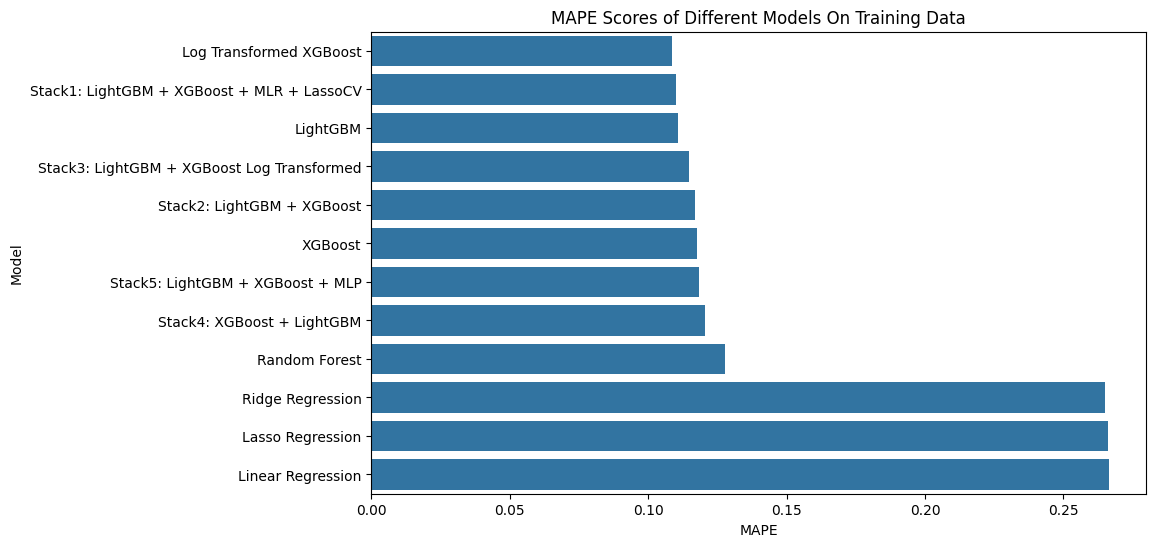

In [148]:
# compare the MAPE scores of the models

mape_scores = {
    'Linear Regression': lr_mape,
    'Ridge Regression': ridge_mape,
    'Lasso Regression': lasso_mape,
    'Random Forest': rf_mape,
    'XGBoost': xgb_mape,
    'Log Transformed XGBoost': log_mape,
    'LightGBM': lgbm_mape,
    'Stack1: LightGBM + XGBoost + MLR + LassoCV': stack1_mape,
    'Stack2: LightGBM + XGBoost': stack2_mape,
    'Stack3: LightGBM + XGBoost Log Transformed': stack3_mape,
    'Stack4: XGBoost + LightGBM': stack4_mape,
    'Stack5: LightGBM + XGBoost + MLP': stack5_mape
}

mape_scores_df = pd.DataFrame(mape_scores.items(), columns=['Model', 'MAPE'])
mape_scores_df = mape_scores_df.sort_values(by='MAPE')

plt.figure(figsize=(10, 6))
sns.barplot(x='MAPE', y='Model', data=mape_scores_df)
plt.title('MAPE Scores of Different Models On Training Data')
plt.xlabel('MAPE')
plt.ylabel('Model')
plt.show()

On the training data when building models, we see that the Log Transformed XGBoost model score slightly higher than Stacking Regression model that we trained.

However, when submitting with the test data on Kaggle, we notice that the Log Transformed XGBoost model does not perform as well as the Stacking Models. Among these Stacking Models, submission to the private leaderboard were made for `stack1` and `stack3`, which score $0.12204$ and $0.12002$ respectively.

In [149]:
# diagnostic plots for the best model

def diagnostic_plots(model, y_test, title):
    # Calculate residuals
    residuals = y_test - model.predict(X_test)

    # Create a figure for diagnostic plots
    plt.figure(figsize=(16, 6))

    #  Predicted vs True values
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=model.predict(X_test), y=y_test)
    plt.plot(y_test, y_test, color='r', label='Actual values')
    plt.xlabel('Predicted Values')
    plt.title('Predicted vs True Values')

    # Residuals vs. Predicted values
    plt.subplot(1, 3, 2)
    sns.scatterplot(x=model.predict(X_test), y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    # Distribution of residuals
    plt.subplot(1, 3, 3)
    sns.histplot(residuals, kde=True)
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    plt.suptitle(f"Diagnostic Plots for {title} Model")
    plt.tight_layout()
    plt.show()
    

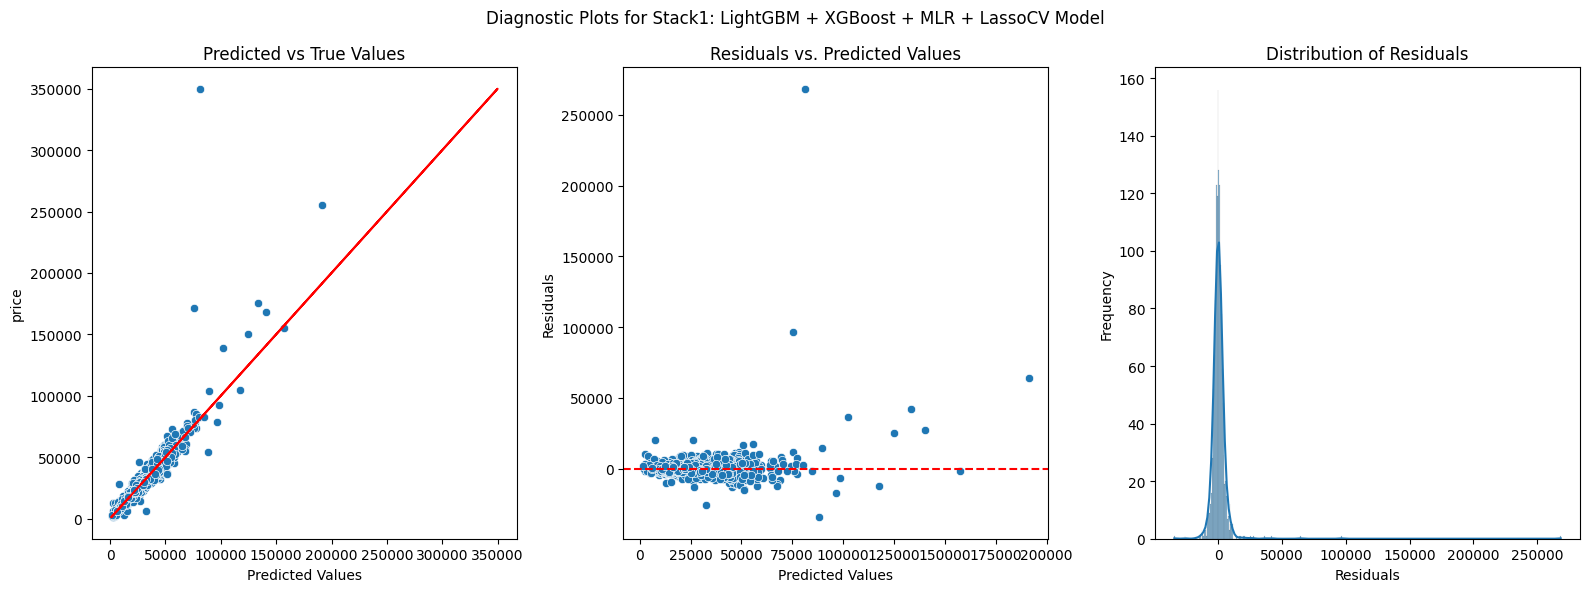

In [152]:
diagnostic_plots(stack1, y_test, "Stack1: LightGBM + XGBoost + MLR + LassoCV")

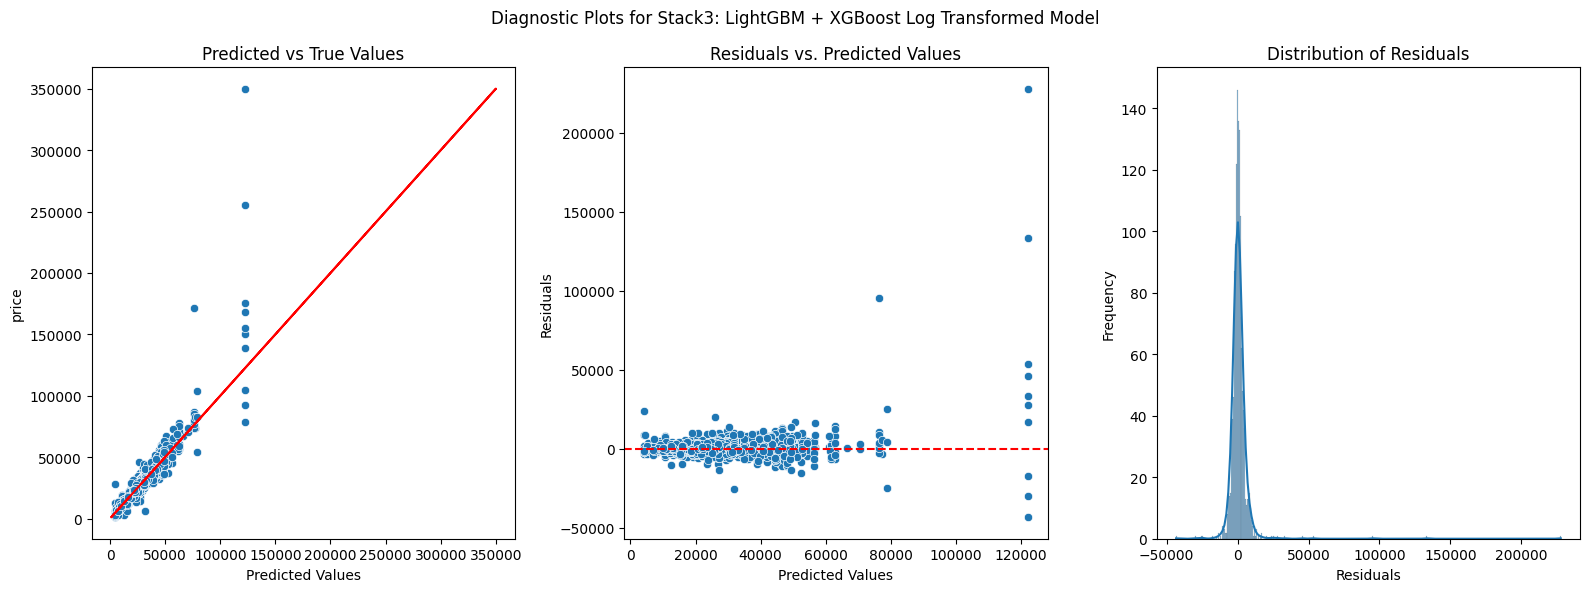

In [154]:
diagnostic_plots(stack3, y_test, "Stack3: LightGBM + XGBoost Log Transformed")

From the diagnostic plots, we see that the 2 models both over-predict and under-predict for outlier cars that have a very high price. However, for other data points they did a good job since:
- The Predicted vs True values plot show a nice line for cars priced < $150,000.
- The Residuals vs Predicted values plot show residuals scatter evenly around 0 for these cars.
- The Distribution of Residuals is also close to normal for these cars.

We will choose not to treat this problem to ensure that the public and private leaderboard score does not fluctuate much in case there are many outliers in rest of the dataset.

## Submission

In [102]:
df_submit = test_encoded_df[rf_selected_features].copy().values

In [115]:
output_stack1 = pd.DataFrame({"vin": df_test['vin'].values, "price": stack1.predict(df_submit)})
output_stack1

,vin,price
0,5J8YD4H05LL032532,52455.399532
1,KNAE45LC8K6050784,41077.464620
2,5XYZGDABXCG149606,9438.519296
3,1G1ZE5ST6HF197903,16731.109693
4,KL4MMDSL6LB106699,26348.950669
...,...,...
2995,1G1BC5SM6H7144984,17828.116981
2996,WBXYH9C03L5R77266,41870.566365
2997,1C6RRFFG4KN799234,35402.481806
2998,1FTEW1E44LKD86114,51472.342909


In [116]:
output_stack1.to_csv('output_stack1.csv', index=False)

In [146]:
output_stack3 = pd.DataFrame({"vin": df_test['vin'].values, "price": stack3.predict(df_submit)})
output_stack3

,vin,price
0,5J8YD4H05LL032532,49756.410156
1,KNAE45LC8K6050784,39571.617188
2,5XYZGDABXCG149606,9047.863281
3,1G1ZE5ST6HF197903,16829.218750
4,KL4MMDSL6LB106699,26650.771484
...,...,...
2995,1G1BC5SM6H7144984,16833.472656
2996,WBXYH9C03L5R77266,40653.449219
2997,1C6RRFFG4KN799234,34959.332031
2998,1FTEW1E44LKD86114,49282.402344


In [147]:
output_stack3.to_csv('output_stack3.csv', index=False)

---
---
## Marking Criteria

To receive full marks your solutions must satisfy the following criteria:

- Problem Description: 12 marks
- Data Cleaning: 12 marks
- Building Forecasting models: 12 marks
- Competition Points: 4 marks
- Forecasts correctly uploaded to Kaggle
- Python code is clean and concise
- Written explanations are provided in clear and easy to understand sentences
- Video presentations are limited to 15 minutes in duration
- Each team member delivers a 5-minute presentation on their assigned task
    - During the video recording, make sure that both your face and Jupyter Notebook are clearly visible
    - Your code must be readable on the video
    - Discuss both the actions you took and, more importantly, the reasoning behind these actions, explaining the significance of key steps
- The assignment notebook is well-organised and easy to follow
- Failure to meet the above marking criteria will result in a deduction of marks

---
---